In [3]:
pip install ludwig

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.6/151.6 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 6.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas

In [4]:
pip install pyyaml ptitprince pandas

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 9.4 MB/s eta 0:00:00
  Created wheel for ptitprince: filename=ptitprince-0.2.7-py3-none-any.whl size=10654 sha256=5a386b4053fcf27a4da4a76addafc6f544a16cd59fe403ea63fe7605cb8edfdb
  Stored in directory: /root/.cache/pip/wheels/0e/43/31/e76a3bf61865543f076a9d9eb027a740caefb379424ecba4e8
Successfully built ptitprince
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [11]:
import pandas as pd
df = pd.read_csv('insurance_claim_status.csv')
df.head()

,age,agency,agency_type,commision_value,destination,distribution_channel,duration,gender,net_sales,product_name,claim
0,28,C2B,Airlines,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,1
1,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,F,37.0,Basic Plan,0
2,27,EPX,Travel Agency,0.00,UNITED STATES,Online,28,NaN,13.0,Cancellation Plan,0
3,36,EPX,Travel Agency,0.00,SAUDI ARABIA,Online,1,NaN,34.0,Cancellation Plan,0
4,26,CWT,Travel Agency,23.76,THAILAND,Online,33,NaN,39.6,Rental Vehicle Excess Insurance,0


In [13]:
from ludwig.api import LudwigModel
model = LudwigModel(config='model_definition.yaml')
model.train(dataset=df)

TrainingResults(train_stats=TrainingStats(training={'net_sales': {'loss': [5763.9140625, 5166.27197265625, 4131.0478515625, 3685.870361328125, 3266.253173828125, 2616.040771484375, 1970.814453125, 1862.2537841796875, 1715.8446044921875, 1637.6173095703125, 1625.1937255859375], 'mean_absolute_error': [44.361778259277344, 59.16268539428711, 42.957115173339844, 40.8167839050293, 42.394351959228516, 34.6469841003418, 29.517030715942383, 27.30728530883789, 26.456602096557617, 24.776445388793945, 23.553348541259766], 'mean_absolute_percentage_error': [438472.28125, 1135004.125, 745175.5625, 732267.1875, 890695.875, 836645.0, 849449.4375, 844433.125, 815566.4375, 803372.0625, 891156.1875], 'mean_squared_error': [5763.9140625, 5166.2724609375, 4131.0478515625, 3685.86962890625, 3266.2529296875, 2616.04052734375, 1970.814453125, 1862.25390625, 1715.844482421875, 1637.6175537109375, 1625.193603515625], 'r2': [-0.3002438545227051, -0.16542589664459229, 0.06810390949249268, 0.16852861642837524, 0.

In [14]:
predictions, _ = model.predict(dataset='insurance_claim_status.csv')
predictions.head()

,net_sales_predictions
0,101.794373
1,46.760914
2,25.888367
3,19.870125
4,64.907867


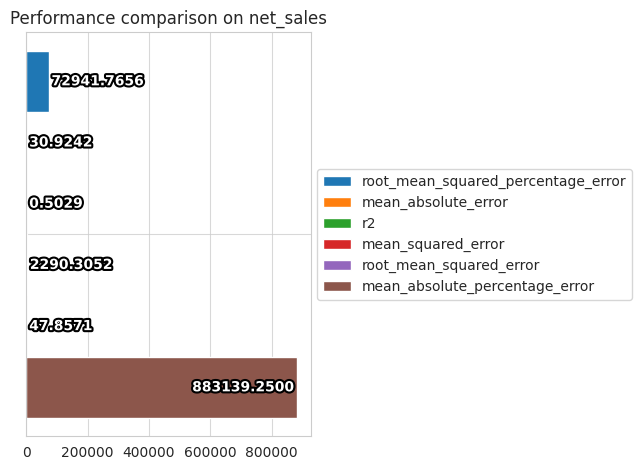

In [15]:
from ludwig.visualize import compare_performance
eval_stats, _, _ = model.evaluate(dataset='insurance_claim_status.csv')
compare_performance([eval_stats])